In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(color_codes=True)

In [3]:
# makes inline plots to have better quality
%config InlineBackend.figure_format = 'svg'

# Set the default style
plt.style.use("seaborn") 

### Read the data and rename columns 

In [4]:
df = pd.read_excel("texts_data.xlsx")

In [5]:
df.columns

Index(['Unnamed: 0', 'Timestamp', 'Total score', 'Your gender', 'Your Age ',
       'Your education level (finished)', 'Your country of origin',
       'Have you ever worked on/studied AI?',
       'Have you passed similar kinds of test before?', 'Your English level',
       'Text 1',
       'In your opinion, how many people will say that it is written by human ? [I say:]',
       'Text 2',
       'In your opinion, how many people will say that it is written by human ? [I say:].1',
       'Text 3',
       'In your opinion, how many people will say that it is written by human ? [I say:].2',
       'Text 4',
       'In your opinion, how many people will say that it is written by human ? [I say:].3',
       'Text 5',
       'In your opinion, how many people will say that text A is written by human (and B by AI)? [I say:]',
       'Text 6',
       'In your opinion, how many people will say that text A is written by human (and B by AI)? [I say:].1',
       'Text 7',
       'In your opinion,

In [6]:
len(df.columns)

26

In [7]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
column_names = ['Timestamp', 'score', 'gender', 'age', 'education', 'country', 'know_ai', 'similar_tests', 'english']

In [9]:
wc_columns = []
for i in range(1,9):
    column_names.append("q" + str(i))
    column_names.append("wc" + str(i))
    wc_columns.append("wc" + str(i))

In [10]:
df.columns = column_names

In [11]:
#string score to score
def total_score(string):
    return int(string[0])
#string percentage to float
def p2f(x):
    return x.str.rstrip('%').astype('float')/100

In [12]:
df['score'] = df['score'].apply(total_score)
df[wc_columns] = df[wc_columns].apply(p2f, axis=1)

In [13]:
#q1-q4: simple questions
#q5-q8: comparison questions
df.head()

,Timestamp,score,gender,age,education,country,know_ai,similar_tests,english,q1,...,q4,wc4,q5,wc5,q6,wc6,q7,wc7,q8,wc8
0,2019/12/23 2:03:56 pm EET,4,F,29,Bachelor's,Estonia,No,No,Proficient/Advanced,Definitely AI,...,Probably human,0.5,"Definitely A=AI, B=human",0.7,"Probably A=human, B=AI",0.6,"Probably A=AI, B=human",0.6,"Probably A=human, B=AI",0.5
1,2019/12/23 2:14:26 pm EET,4,M,29,Master's,Bangladesh,No,No,Elementary/Beginner,Definitely human,...,I don't know,0.0,"Probably A=human, B=AI",0.0,I don't know,0.0,"Definitely A=human, B=AI",0.0,"Defintiely A=human, B=AI",0.0
2,2019/12/23 2:47:37 pm EET,1,F,23,Master's,Russia,No,No,Proficient/Advanced,Probably human,...,Definitely human,0.9,"Probably A=AI, B=human",0.4,"Definitely A=AI, B=human",0.4,"Definitely A=human, B=AI",0.6,"Defintiely A=human, B=AI",0.7
3,2019/12/23 3:25:45 pm EET,4,F,24,Master's,Russia,Yes,Yes,Upper-Intermediate/Intermediate,Probably AI,...,Probably human,0.9,"Probably A=AI, B=human",0.1,"Probably A=human, B=AI",0.3,"Probably A=human, B=AI",0.3,"Probably A=human, B=AI",0.5
4,2019/12/23 3:52:53 pm EET,4,M,25,Master's,Russia,No,No,Proficient/Advanced,Probably AI,...,Probably human,0.6,"Probably A=AI, B=human",0.5,"Probably A=AI, B=human",0.7,"Probably A=human, B=AI",0.7,"Probably A=human, B=AI",0.6


### Plots

#### 1. Time graph (for all data)

In [14]:
df_images = pd.read_excel("images_data.xlsx")
df_sounds = pd.read_excel("sounds_data.xlsx")

df_images['date'] = pd.to_datetime(df_images['Timestamp']).dt.date
df_sounds['date'] = pd.to_datetime(df_sounds['Timestamp']).dt.date

In [15]:
df['date'] = pd.to_datetime(df['Timestamp']).dt.date

In [16]:
df_all = pd.concat([df.date, df_sounds.date, df_images.date], axis=1)
df_all.columns = ['texts', 'sounds', 'images']

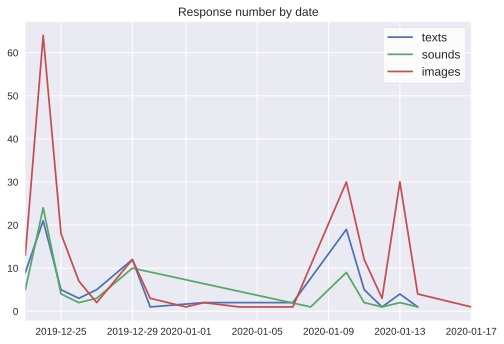

In [17]:
hist1 = df_all.texts.value_counts().plot()
hist2 = df_all.sounds.value_counts().plot()
hist3 = df_all.images.value_counts().plot()
plt.title('Response number by date')
plt.legend(prop={'size': 12}, frameon=True, facecolor='white')
plt.show()

#### 2. Age distribution

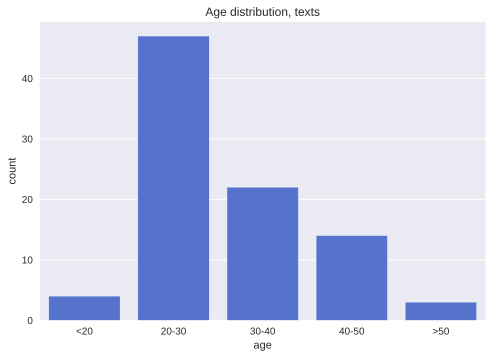

In [18]:
sns.countplot(pd.cut(df['age'],
                     bins=[0,20,30,40,50,100], 
                     labels=["<20","20-30","30-40","40-50",">50"]), 
              color="royalblue")
plt.title('Age distribution, texts')
plt.show()

#### 3. Worked on/studied AI

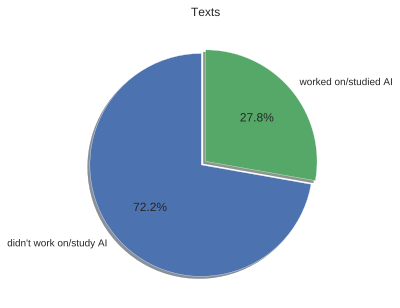

In [19]:
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(df['know_ai'].value_counts(),explode=(0.05,0),labels=["didn't work on/study AI",'worked on/studied AI'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Texts")
plt.show()

#### 4. Passed similar tests before

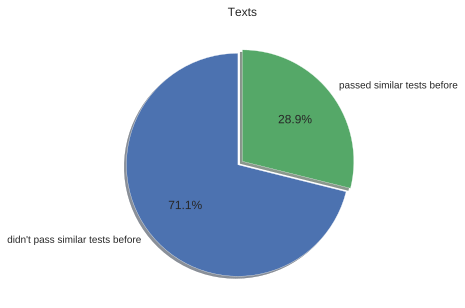

In [20]:
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(df['similar_tests'].value_counts(),explode=(0.05,0),labels=["didn't pass similar tests before","passed similar tests before"], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Texts")
plt.show()

#### 5. Country of origin pie plot

In [21]:
temp_df = df['country'].value_counts()
temp_df2 = temp_df.head(4)
if len(temp_df) > 4:
    temp_df2['Others'.format(len(temp_df) - 4)] = sum(temp_df[4:])

In [22]:
temp_df2

Estonia    38
Russia     15
Finland     6
Ukraine     4
Others     27
Name: country, dtype: int64

In [23]:
list(temp_df2.index)

['Estonia', 'Russia', 'Finland', 'Ukraine', 'Others']

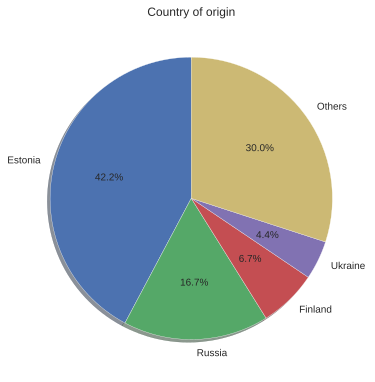

In [24]:
#country of origin pie plot
fig, ax = plt.subplots(figsize=(7,6.5))
ax.pie(temp_df2, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 10}, labels = list(temp_df2.index))
plt.title("Country of origin")
plt.show()

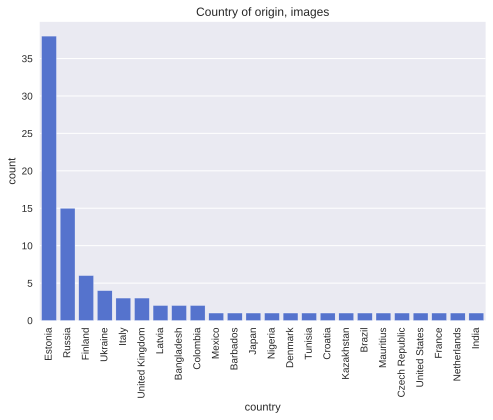

In [25]:
# country of origin historgam
hist = sns.countplot(x = 'country',
              data = df,
              order = df['country'].value_counts().index,
              color = "royalblue")
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
plt.title("Country of origin, images")
plt.show()

#### 6. English level

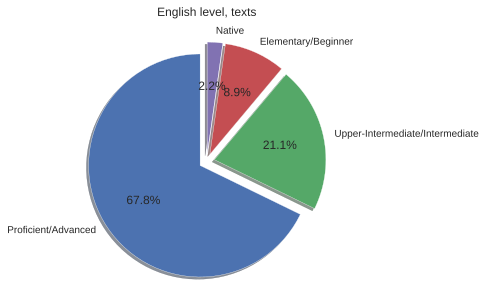

In [26]:
fig, ax = plt.subplots(figsize=(5,5.5))
ax.pie(df['english'].value_counts(),explode=(0.07,0.07,0.07,0.07),labels=["Proficient/Advanced",
                                                                                "Upper-Intermediate/Intermediate",
                                                                                "Elementary/Beginner",
                                                                                "Native"],
       autopct='%1.1f%%',
       shadow=True, startangle=90)
plt.title("English level, texts")
plt.show()

#### 7. Scores distribution

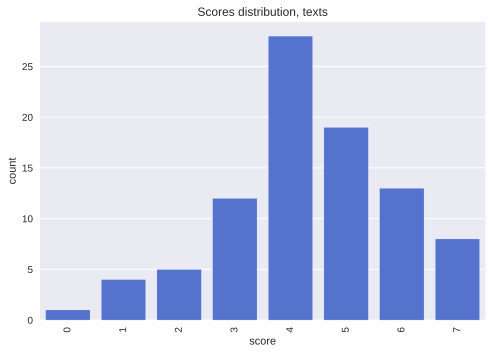

In [27]:
hist = sns.countplot(x = 'score',
              data = df,
              color = "royalblue")
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)
plt.title("Scores distribution, texts")
plt.show()

******************

#### Map question columns into 0/1

In [28]:
#dictionaries for mapping

# q1, q4
d1 = {"Probably AI" : 1,
      "Definitely AI": 1,
      "I don't know": 0,
      "Probably human": 0,
      "Definitely human": 0}

#q2, q3
d2 = {"Probably AI" : 0,
      "Definitely AI": 0,
      "I don't know": 0,
      "Probably human": 1,
      "Definitely human": 1}

#q5, q6, q7
d4 = {"Definitely A=AI, B=human": 1,
      "Probably A=AI, B=human": 1,
      "I don't know": 0,
      "Definitely A=human, B=AI": 0,
      "Probably A=human, B=AI": 0}

#q8
d3 = {"Definitely A=AI, B=human": 0,
      "Probably A=AI, B=human": 0,
      "I don't know": 0,
      "Definitely A=human, B=AI": 1,
      "Probably A=human, B=AI": 1}

In [29]:
df_mapped = df.copy()

columns1 = ["q1", "q4"]
for col in columns1:
    df_mapped[col] = df[col].map(d1)
    
columns2 = ["q2", "q3"]
for col in columns2:
    df_mapped[col] = df[col].map(d2)

columns3 = ["q5", "q6", "q7"]
for col in columns3:
    df_mapped[col] = df[col].map(d3)

columns4 = ["q8"]
for col in columns4:
    df_mapped[col] = df[col].map(d4)

In [30]:
df_mapped.head()

,Timestamp,score,gender,age,education,country,know_ai,similar_tests,english,q1,...,wc4,q5,wc5,q6,wc6,q7,wc7,q8,wc8,date
0,2019/12/23 2:03:56 pm EET,4,F,29,Bachelor's,Estonia,No,No,Proficient/Advanced,1,...,0.5,0,0.7,1,0.6,0,0.6,0.0,0.5,2019-12-23
1,2019/12/23 2:14:26 pm EET,4,M,29,Master's,Bangladesh,No,No,Elementary/Beginner,0,...,0.0,1,0.0,0,0.0,1,0.0,NaN,0.0,2019-12-23
2,2019/12/23 2:47:37 pm EET,1,F,23,Master's,Russia,No,No,Proficient/Advanced,0,...,0.9,0,0.4,0,0.4,1,0.6,NaN,0.7,2019-12-23
3,2019/12/23 3:25:45 pm EET,4,F,24,Master's,Russia,Yes,Yes,Upper-Intermediate/Intermediate,1,...,0.9,0,0.1,1,0.3,1,0.3,0.0,0.5,2019-12-23
4,2019/12/23 3:52:53 pm EET,4,M,25,Master's,Russia,No,No,Proficient/Advanced,1,...,0.6,0,0.5,0,0.7,1,0.7,0.0,0.6,2019-12-23


****************************

In [31]:
simple_questions = ['q1','q2','q3','q4']
comparison_questions = ['q5','q6','q7','q8']

In [32]:
df_mapped['simple_sum'] = df_mapped[simple_questions].sum(axis=1)
df_mapped['comparison_sum'] = df_mapped[comparison_questions].sum(axis=1)

#### 8. Scores distribution, simple questions vs comparison questions

In [33]:
simple_average = np.round(np.sum(df_mapped['simple_sum'])/df_mapped.shape[0],2)
comparison_average = np.round(np.sum(df_mapped['comparison_sum'])/df_mapped.shape[0],2)

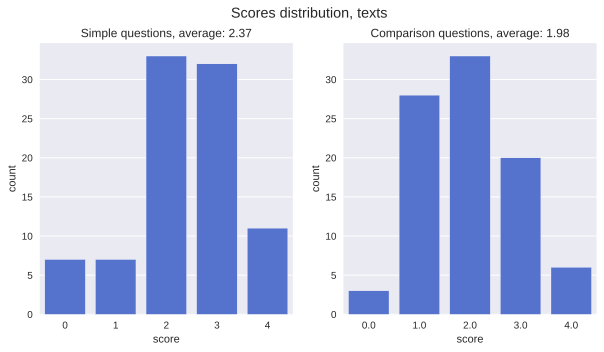

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

hist1 = sns.countplot(x = 'simple_sum',
                     data = df_mapped,
                     color = "royalblue",
                     ax = ax1)
ax1.set_xlabel('score')
ax1.set_title('Simple questions, average: ' + str(simple_average))

hist2 = sns.countplot(x = 'comparison_sum',
                     data = df_mapped,
                     color = "royalblue",
                     ax = ax2)
ax2.set_xlabel('score')
ax2.set_title('Comparison questions, average: ' + str(comparison_average))

fig.suptitle("Scores distribution, texts")
plt.show()

#### 9. Question average score vs wisdom of the crowd

In [35]:
score_columns = [column for column in df_mapped.columns if column.startswith('q')]

In [36]:
score_columns

['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8']

In [37]:
questions_average = np.sum(df_mapped[score_columns], axis = 0)/df_mapped.shape[0]

In [38]:
questions_average = np.round(questions_average*100,2)

In [39]:
questions_average

q1    80.00
q2    67.78
q3    51.11
q4    37.78
q5    34.44
q6    55.56
q7    71.11
q8    36.67
dtype: float64

In [40]:
wc_to_invert = ['wc1', 'wc4', 'wc8']

In [41]:
#invert wisdom of the crowd columns when needed
df_mapped_inverted = df_mapped.copy()
df_mapped_inverted[wc_to_invert] = np.array([[1]*3]*df_mapped.shape[0]) - df_mapped[wc_to_invert]

In [42]:
wc_average = np.sum(df_mapped_inverted[wc_columns], axis = 0)/df_mapped.shape[0]
wc_average = np.round(wc_average*100,2)

In [43]:
wc_average

wc1    57.89
wc2    58.00
wc3    51.44
wc4    50.00
wc5    42.89
wc6    49.44
wc7    50.78
wc8    52.44
dtype: float64

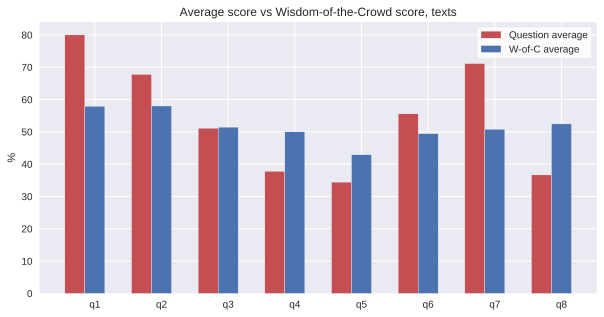

In [44]:
N = 8
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

bars_q = ax.bar(ind, questions_average, width, color='r')
bars_wc = ax.bar(ind+width, wc_average, width, color='b')

ax.set_ylabel('%')
ax.set_xticks(ind+width)
ax.set_xticklabels(score_columns)
ax.legend( (bars_q[0], bars_wc[0]), ('Question average', 'W-of-C average') , frameon=True, facecolor='white')


plt.title("Average score vs Wisdom-of-the-Crowd score, texts")
plt.show()


#### 10. Scores by English level

In [45]:
df_mapped.english.value_counts()

Proficient/Advanced                61
Upper-Intermediate/Intermediate    19
Native                              8
Elementary/Beginner                 2
Name: english, dtype: int64

In [46]:
adv_eng_df = df_mapped[df_mapped.english.isin(['Proficient/Advanced', 'Native'])]
not_adv_eng_df = df_mapped[~df_mapped.english.isin(['Proficient/Advanced', 'Native'])]

In [59]:
eng_score_aver = np.round(np.sum(adv_eng_df['score'])/adv_eng_df.shape[0],2)
not_eng_score_aver = np.round(np.sum(not_know_ai_df['score'])/not_know_ai_df.shape[0],2)

In [60]:
ai_score_aver

4.72

In [61]:
not_ai_score_aver

4.2

In [47]:
adv_eng_average = np.sum(adv_eng_df[score_columns], axis = 0)/adv_eng_df.shape[0]
adv_eng_average = np.round(adv_eng_average*100,2)
adv_eng_average

q1    79.71
q2    69.57
q3    55.07
q4    40.58
q5    31.88
q6    50.72
q7    68.12
q8    36.23
dtype: float64

In [48]:
not_adv_eng_average = np.sum(not_adv_eng_df[score_columns], axis = 0)/not_adv_eng_df.shape[0]
not_adv_eng_average = np.round(not_adv_eng_average*100,2)
not_adv_eng_average

q1    80.95
q2    61.90
q3    38.10
q4    28.57
q5    42.86
q6    71.43
q7    80.95
q8    38.10
dtype: float64

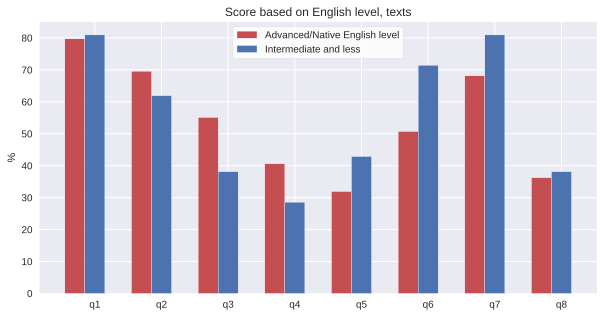

In [49]:
N = 8
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

bars_adv = ax.bar(ind, adv_eng_average, width, color='r')
bars_not_adv = ax.bar(ind+width, not_adv_eng_average, width, color='b')

ax.set_ylabel('%')
ax.set_xticks(ind+width)
ax.set_xticklabels(score_columns)
ax.legend( (bars_adv[0], bars_not_adv[0]), ('Advanced/Native English level', 'Intermediate and less') , frameon=True, facecolor='white')


plt.title("Score based on English level, texts")
plt.show()


#### 11. Scores by knowledge of AI

In [50]:
df_mapped.know_ai.value_counts()

No     65
Yes    25
Name: know_ai, dtype: int64

In [51]:
know_ai_df = df_mapped[df_mapped.know_ai=='Yes']
not_know_ai_df = df_mapped[df_mapped.know_ai=='No']

In [59]:
ai_score_aver = np.round(np.sum(know_ai_df['score'])/know_ai_df.shape[0],2)
not_ai_score_aver = np.round(np.sum(not_know_ai_df['score'])/not_know_ai_df.shape[0],2)

In [60]:
ai_score_aver

4.72

In [61]:
not_ai_score_aver

4.2

In [52]:
know_ai_average = np.sum(know_ai_df[score_columns], axis = 0)/know_ai_df.shape[0]
know_ai_average = np.round(know_ai_average*100,2)

not_know_ai_average = np.sum(not_know_ai_df[score_columns], axis = 0)/not_know_ai_df.shape[0]
not_know_ai_average = np.round(not_know_ai_average*100,2)

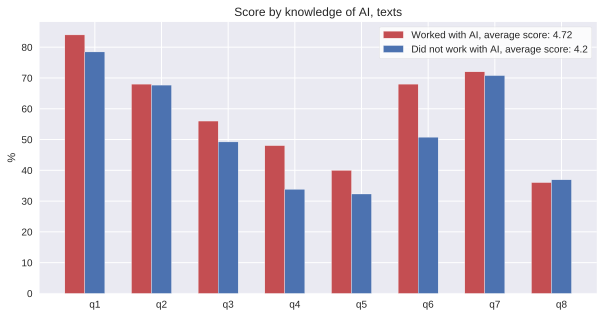

In [62]:
N = 8
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

bars_ai = ax.bar(ind, know_ai_average, width, color='r')
bars_not_ai = ax.bar(ind+width, not_know_ai_average, width, color='b')

ax.set_ylabel('%')
ax.set_xticks(ind+width)
ax.set_xticklabels(score_columns)
ax.legend( (bars_ai[0], bars_not_ai[0]), ('Worked with AI, average score: ' + str(ai_score_aver), 'Did not work with AI, average score: ' + str(not_ai_score_aver)) , frameon=True, facecolor='white')


plt.title("Score by knowledge of AI, texts")
plt.show()


In [54]:
not_adv_eng_average = np.sum(not_adv_eng_df[score_columns], axis = 0)/not_adv_eng_df.shape[0]
not_adv_eng_average = np.round(not_adv_eng_average*100,2)
not_adv_eng_average

q1    80.95
q2    61.90
q3    38.10
q4    28.57
q5    42.86
q6    71.43
q7    80.95
q8    38.10
dtype: float64

#### 12. Scores by education level

In [55]:
df_mapped.education.value_counts()

Master's       43
Bachelor's     26
PhD            12
High school     9
Name: education, dtype: int64

In [56]:
masters_and_higher_df = df_mapped[df_mapped.education.isin(["Master's", "PhD"])]
bachelor_and_lower_df = df_mapped[~df_mapped.education.isin(["Master's", "PhD"])]

In [57]:
masters_and_higher_average = np.sum(masters_and_higher_df[score_columns], axis = 0)/masters_and_higher_df.shape[0]
masters_and_higher_average = np.round(masters_and_higher_average*100,2)

bachelor_and_lower_average = np.sum(bachelor_and_lower_df[score_columns], axis = 0)/bachelor_and_lower_df.shape[0]
bachelor_and_lower_average = np.round(bachelor_and_lower_average*100,2)

In [63]:
higher_score_aver = np.round(np.sum(masters_and_higher_df['score'])/masters_and_higher_df.shape[0],2)
lower_score_aver = np.round(np.sum(bachelor_and_lower_df['score'])/bachelor_and_lower_df.shape[0],2)

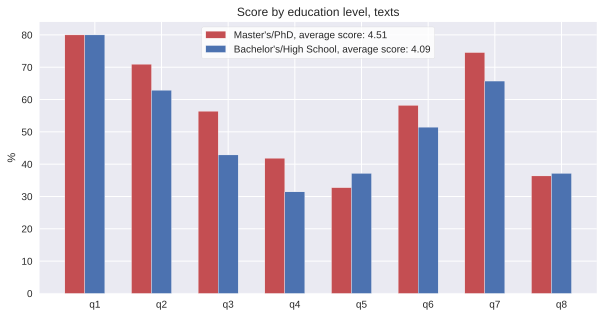

In [64]:
N = 8
ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

bars_higher = ax.bar(ind, masters_and_higher_average, width, color='r')
bars_lower = ax.bar(ind+width, bachelor_and_lower_average, width, color='b')

ax.set_ylabel('%')
ax.set_xticks(ind+width)
ax.set_xticklabels(score_columns)
ax.legend( (bars_higher[0], bars_lower[0]), ("Master's/PhD, average score: " + str(higher_score_aver), "Bachelor's/High School, average score: " + str(lower_score_aver)) , frameon=True, facecolor='white')


plt.title("Score by education level, texts")
plt.show()
